In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
pd.options.display.max_columns = None #show all columns in data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
print(df.head())
print(df['Occurrence_Category'].isnull().sum())
# remove missing values from a specific column
df.dropna(subset=['Occurrence_Category'], inplace=True)

   Arrest_Year Arrest_Month  EventID   ArrestID  PersonID     Perceived_Race  \
0         2020    July-Sept  1005907  6017884.0    326622              White   
1         2020    July-Sept  1014562  6056669.0    326622              White   
2         2020      Oct-Dec  1029922  6057065.0    326622  Unknown or Legacy   
3         2021      Jan-Mar  1052190  6029059.0    327535              Black   
4         2021      Jan-Mar  1015512  6040372.0    327535        South Asian   

  Sex Age_group__at_arrest_ Youth_at_arrest__under_18_years ArrestLocDiv  \
0   M   Aged 35 to 44 years                     Not a youth           54   
1   M   Aged 35 to 44 years                     Not a youth           54   
2   M   Aged 35 to 44 years                     Not a youth           54   
3   M   Aged 25 to 34 years                     Not a youth           XX   
4   M   Aged 25 to 34 years                     Not a youth           XX   

   StripSearch  Booked                     Occurrence_Category

In [3]:
#code for Cohen's D 

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [4]:
# create a new continuous variable - the likelihood of strip-searched in each Occurrence_Category
# group the data by Occurrence_Category and count the occurrences of each category
strip_search_counts = df.groupby("Occurrence_Category")["StripSearch"].sum()
#print(strip_search_counts)
total_strip_searches = df["StripSearch"].sum()
print(total_strip_searches)
# calculate the likelihood of being strip-searched in each occurrence category
occurrence_counts = df.groupby("Occurrence_Category").size()
occurrence_strip_search_likelihoods = strip_search_counts / occurrence_counts
print(occurrence_strip_search_likelihoods)
# add the new column of occurrence_strip_search_likelihoods to the dataframe and matching the occurrence category
df["Occurrence_Category_Strip_Search_Likelihood"] = df["Occurrence_Category"].map(occurrence_strip_search_likelihoods)
print(df["Occurrence_Category_Strip_Search_Likelihood"].head(10))

7800
Occurrence_Category
Assault                                            0.013461
Assault & Other crimes against persons             0.197236
Break & Enter                                      0.462882
Break and Enter                                    0.040323
Crimes against Children                            0.000000
Drug Related                                       0.391494
FTA/FTC, Compliance Check & Parollee               0.319835
FTA/FTC/Compliance Check/Parollee                  0.021196
Fraud                                              0.002110
Harassment & Threatening                           0.205836
Harassment/Threatening                             0.006686
Homicide                                           0.041096
Impaired                                           0.005140
LLA                                                0.001706
Mental Health                                      0.008368
Mischief                                           0.015129
Mischief & Frau

In [5]:
#create sex size groups from dataset 
#creating two different datasets one with Male and Female
male_sex = df[df['Sex']=='M']
female_sex = df[df['Sex']=='F']

M_Occurrence_Category_Strip_Search_Likelihood = male_sex['Occurrence_Category_Strip_Search_Likelihood']
F_Occurrence_Category_Strip_Search_Likelihood = female_sex['Occurrence_Category_Strip_Search_Likelihood']
male_sex

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Occurrence_Category_Strip_Search_Likelihood
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,0.197236
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2,0.197236
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3,0.197236
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4,0.006686
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5,0.021196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65268,2021,Oct-Dec,1028795,6018445.0,328838,Black,M,Aged 25 to 34 years,Not a youth,51,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65269,0.013461
65269,2021,Oct-Dec,1046034,6054461.0,333136,White,M,Aged 45 to 54 years,Not a youth,XX,0,0,Police Category - Incident,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65270,0.003546
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273,0.013461
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275,0.017581


In [6]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(M_Occurrence_Category_Strip_Search_Likelihood,F_Occurrence_Category_Strip_Search_Likelihood)
alpha = 0.05
power = 0.8
ratio_ =len(M_Occurrence_Category_Strip_Search_Likelihood)/len(F_Occurrence_Category_Strip_Search_Likelihood) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for Likelihood of being strip searched in each occurrence category is :',effect_size)

Effect size (Cohen's D) for Likelihood of being strip searched in each occurrence category is : 0.02176077818674804


In [7]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for F_Occurrence_Category_Strip_Search_Likelihood') 
print('Actual size of F_Occurrence_Category_Strip_Search_Likelihood:', len(F_Occurrence_Category_Strip_Search_Likelihood))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for M_Occurrence_Category_Strip_Search_Likelihood')
print('Actual size of M_Occurrence_Category_Strip_Search_Likelihood:', len(M_Occurrence_Category_Strip_Search_Likelihood))

Sample Size of nobs1: 20547.158 needed for F_Occurrence_Category_Strip_Search_Likelihood
Actual size of F_Occurrence_Category_Strip_Search_Likelihood: 12584
Sample Size of nobs2: 85751.403 needed for M_Occurrence_Category_Strip_Search_Likelihood
Actual size of M_Occurrence_Category_Strip_Search_Likelihood: 52518


In [8]:
#another way to go about this is the other direction. We can test the power of a proposed sample size 

from statsmodels.stats.power import TTestPower

power = TTestPower()
n_test = power.solve_power(nobs=12584, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


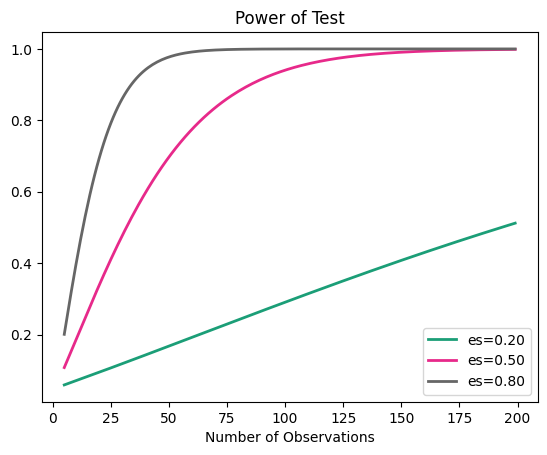

In [9]:
#lastly power curve

effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 200))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

In [10]:
num_arrests = df['ArrestID'].value_counts()
num_arrests
print(df['Age_group__at_arrest_'].unique())

['Aged 35 to 44 years' 'Aged 25 to 34 years' 'Aged 45 to 54 years'
 'Aged 55 to 64 years' 'Aged 18 to 24 years' 'Aged 65 and older'
 'Aged 65 years and older' nan 'Aged 17 years and younger'
 'Aged 17 years and under']


In [11]:
age_map = {'Aged 35 to 44 years': 35, 'Aged 25 to 34 years': 25, 'Aged 45 to 54 years': 45, 
          'Aged 55 to 64 years': 55, 'Aged 18 to 24 years': 18, 'Aged 65 and older': 65,
          'Aged 65 years and older': 65,'Aged 17 years and younger': 17,'Aged 17 years and under': 17}
df['Age_Estimated'] = df['Age_group__at_arrest_'].map(age_map)
print(df["Age_Estimated"].head(10))

0    35.0
1    35.0
2    35.0
3    25.0
4    25.0
5    25.0
6    25.0
7    25.0
8    25.0
9    25.0
Name: Age_Estimated, dtype: float64


In [12]:
!pip install pingouin #if not installed on your virtual env then pip install 

import pandas as pd
from pingouin import ancova
pd.options.display.max_columns = None #show all columns in data


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=8147cd16d10e67f5f818abb84966f2db15a0d530ab6f6901dcc5cf6b47cc2ea7
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [13]:
df['Sex'].unique() #our x_1 which is a categorical variable 
df['Age_Estimated'].unique() #our x_2 is NOT a categorical variable and is another continuous variable 
df['Occurrence_Category_Strip_Search_Likelihood'].unique() #our dependent variable 

array([0.19723566, 0.00668648, 0.02119642, 0.01346104, 0.01758125,
       0.00953516, 0.1426097 , 0.20159635, 0.00977366, 0.17707424,
       0.31983492, 0.391494  , 0.05776173, 0.04957006, 0.12880325,
       0.20583596, 0.41719457, 0.04032258, 0.01512859, 0.4628821 ,
       0.11727617, 0.        , 0.0035461 , 0.0021097 , 0.00170648,
       0.0083682 , 0.00105932, 0.00651042, 0.02858362, 0.0051395 ,
       0.04109589])

In [14]:
#isolate columns of interest into a new df
df_1way = df[['Sex', 'Age_Estimated', 'Occurrence_Category_Strip_Search_Likelihood']].copy()

df_1way.head()

,Sex,Age_Estimated,Occurrence_Category_Strip_Search_Likelihood
0,M,35.0,0.197236
1,M,35.0,0.197236
2,M,35.0,0.197236
3,M,25.0,0.006686
4,M,25.0,0.021196


In [15]:
#inspect the data is stored correctly in the df
df_1way.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65111 entries, 0 to 65275
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Sex                                          65111 non-null  object 
 1   Age_Estimated                                65087 non-null  float64
 2   Occurrence_Category_Strip_Search_Likelihood  65111 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.0+ MB


In [17]:
ancova(data=df, dv='Occurrence_Category_Strip_Search_Likelihood', covar='Age_Estimated', between='Sex')

,Source,SS,DF,F,p-unc,np2
0,Sex,0.130534,2,4.153933,1.570670e-02,0.000128
1,Age_Estimated,2.755201,1,175.354911,5.642759e-40,0.002687
2,Residual,1022.593413,65083,NaN,NaN,NaN


In [16]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
pd.options.display.max_columns = None #show all columns in data

In [18]:
df['Youth_at_arrest__under_18_years'].unique()

array(['Not a youth', 'Youth (aged 17 and younger)',
       'Youth (aged 17 years and under)'], dtype=object)

In [19]:
df = df.dropna(subset=['StripSearch', 'Sex', 'Perceived_Race', 'Age_group__at_arrest_'])
sex_map = {'U': 0, 'M': 1, 'F': 2}
df['sex_coded'] = df['Sex'].map(sex_map)
#print(df['sex_coded'].head(10))
race_map = {'Black':0, 'White':1, 'Latino':0,'South Asian':0, 'Middle-Eastern':0,'Unknown or Legacy':0 , 'East/Southeast Asian':0, 'Indigenous':0}
df['race_coded'] = df['Perceived_Race'].map(race_map)
x = df[['sex_coded', 'race_coded', 'Age_Estimated']].copy()
y = df.StripSearch
x.info()
y.info()
# Split these data into training and testing datasets
#set random seed for replicability 
#you may want to consider stratifying your train test split (creates splits by preserving the same percentage for each target class as in the complete set.)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123)
y_train
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65083 entries, 0 to 65275
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex_coded      65083 non-null  int64  
 1   race_coded     65083 non-null  int64  
 2   Age_Estimated  65083 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.0 MB
<class 'pandas.core.series.Series'>
Int64Index: 65083 entries, 0 to 65275
Series name: StripSearch
Non-Null Count  Dtype
--------------  -----
65083 non-null  int64
dtypes: int64(1)
memory usage: 1016.9 KB
   Arrest_Year Arrest_Month  EventID   ArrestID  PersonID     Perceived_Race  \
0         2020    July-Sept  1005907  6017884.0    326622              White   
1         2020    July-Sept  1014562  6056669.0    326622              White   
2         2020      Oct-Dec  1029922  6057065.0    326622  Unknown or Legacy   
3         2021      Jan-Mar  1052190  6029059.0    327535              Black   
4         2021  

<ipython-input-19-8f78b8ecaf33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex_coded'] = df['Sex'].map(sex_map)
<ipython-input-19-8f78b8ecaf33>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race_coded'] = df['Perceived_Race'].map(race_map)


In [20]:
#building the model with statsmodels
import statsmodels.formula.api as smf

# Create the formula string 
all_columns = ' + '.join(x)
formula = "StripSearch ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
reg = smf.logit(formula, data=trainingdata).fit()

Formula:  StripSearch ~ sex_coded + race_coded + Age_Estimated 

Optimization terminated successfully.
         Current function value: 0.363212
         Iterations 6


In [21]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            StripSearch   No. Observations:                52066
Model:                          Logit   Df Residuals:                    52062
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                0.006702
Time:                        15:35:18   Log-Likelihood:                -18911.
converged:                       True   LL-Null:                       -19039.
Covariance Type:            nonrobust   LLR p-value:                 4.883e-55
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2742      0.059    -21.632      0.000      -1.390      -1.159
sex_coded        -0.2734      0.036     -7.494      0.000      -0.345      -0.202
race_coded        0.2246      0.028      8.091      0.000       0.170       0.279
Age_Estimated    -0.0161      0.001    -13.086      0.000      -0.019      -0.014
=================================================================================
"""

In [22]:
#getting odds ratio 
np.exp(reg.params)

Intercept        0.279664
sex_coded        0.760760
race_coded       1.251841
Age_Estimated    0.983988
dtype: float64

In [23]:
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.249172,0.313887,0.279664
sex_coded,0.708251,0.817161,0.760760
race_coded,1.185546,1.321842,1.251841
Age_Estimated,0.981612,0.986370,0.983988


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_1 = reg.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.8783129753399401


In [25]:
# Confusion matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#C0,0 is true negative, C1,0 is false negative, C1,1 is true positive, C0,1 false positive 

cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[11433     0]
 [ 1584     0]]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65083 entries, 0 to 65275
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age_Estimated  65083 non-null  float64
dtypes: float64(1)
memory usage: 1016.9 KB
<class 'pandas.core.series.Series'>
Int64Index: 65083 entries, 0 to 65275
Series name: StripSearch
Non-Null Count  Dtype
--------------  -----
65083 non-null  int64
dtypes: int64(1)
memory usage: 1016.9 KB


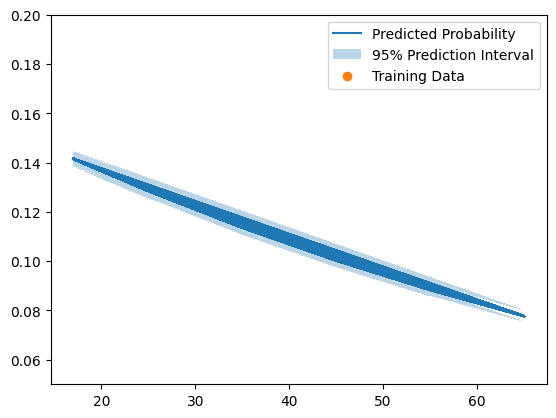

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm
# 'sex_coded', 'race_coded', 'Age_Estimated'
x = df[['Age_Estimated']].copy()
y = df.StripSearch
x.info()
y.info()
# Split these data into training and testing datasets
#set random seed for replicability 
#you may want to consider stratifying your train test split (creates splits by preserving the same percentage for each target class as in the complete set.)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123)
y_train
# Fit a logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions and compute prediction interval
y_pred = model.predict_proba(x_test)[:, 1]
std_error = np.sqrt(y_pred * (1 - y_pred) / len(x_train))
z = norm.ppf(0.975)
lower = y_pred - z * std_error
upper = y_pred + z * std_error

# Plot the prediction interval
fig, ax = plt.subplots()
ax.plot(x_test, y_pred, label='Predicted Probability')
ax.fill_between(x_test.squeeze(), lower, upper, alpha=0.3, label='95% Prediction Interval')
ax.scatter(x_train, y_train, marker='o', label='Training Data')
ax.legend()
plt.ylim(0.05, 0.2)
plt.show()